# Limestone Data Challenge 2024
### Contributers: Ansh Agarwal, Shashwat Kasliwal

Hello and welcome to our submission!

We're excited to present our final solution, accompanied by insights into our thought process and decision-making,as well as alternate ideas we had for implementing the logic. Let's dive into the code and commentary.



### Solution to Problem Statement 
My approach involves using the K-means clustering algorithm to analyze a dataset of players' behavior in the Prisoner's Dilemma. Here's a summary 

Data Preparation: You start with a feature extraction from the dataset. We defined 12 metrics to score the play strategy and we normalized it.

Data Clustering: We confronted it as a clustering problem. We used the k-means clustering approach using scikit-learn.
Finding Optimal Number of Clusters:

We used the silhouette score method, to compute silhouette scores for different numbers of clusters and select the number of clusters that maximizes the silhouette score.
Cluster Analysis:

After determining the optimal number of clusters, we applied the K-means algorithm with this number of clusters to the dataset.
You assign cluster labels to each data point (player) and analyze the resulting clusters.

In [169]:
import csv
import numpy as np
import math

# For clustering of stocks into sectors
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

# For making neural net models of indices
import torch
from torch import nn
from torch import optim

# For data visualisation
import matplotlib.pyplot as plt

# For random initialization of the trading strategy vector
import random

# For making waiting fun :)
from tqdm import tqdm

In [170]:
def relu(x):
    return 1/(1+np.exp(-x))

In [171]:
#list of feautures that we have defined inside for the dataset
niceness=[]
retailiating=[]
forgiving=[]
non_envious=[]
cheating_sequence_length=[] 

for i in range(202):
    niceness.append(-1)
    retailiating.append(-1)
    forgiving.append(-1)
    non_envious.append(-1)
    cheating_sequence_length.append(-1)

def niceness_value(player_moves,opponent_moves):
    number_of_rounds=len(player_moves)
    number_of_trusts=0
    for i in range(len(player_moves)):
        if player_moves[i]=="TRUST":
            number_of_trusts+=1
    y=number_of_trusts/number_of_rounds
    return relu(y-0.5)

def retailiating_value(player_moves,opponent_moves):
    number_of_rounds=len(player_moves)
    number_of_trusts=0
    for i in range(len(player_moves)):
        if player_moves[i]=="CHEAT" and opponent_moves[i-1]=="CHEAT":
            number_of_trusts+=1
    y =  number_of_trusts/number_of_rounds
    return relu(y-0.5)
    

def forgiving_value(player_moves,opponent_moves):
    number_of_rounds=len(player_moves)
    number_of_betrayals=0
    for i in range(1,len(player_moves)):
        if player_moves[i]=="TRUST" and opponent_moves[i-1]=="CHEAT":
            number_of_betrayals+=1
    y = number_of_betrayals/number_of_rounds
    return relu(y-0.5)   

def non_envious_value(player_moves,opponent_moves):
    number_of_rounds=len(player_moves)
    number_of_betrayals=0
    for i in range(1,len(player_moves)):
        if player_moves[i]=="TRUST" and opponent_moves[i-1]=="TRUST":
            number_of_betrayals+=1
    y =  number_of_betrayals/number_of_rounds
    return relu(y-0.5)     

def retaliation_frequency(player_moves,opponent_moves):
    #return 0
    number_of_rounds=len(player_moves)
    lengths_of_cheating_sequences=[]
    for i in range(len(player_moves)):
        if player_moves[i]=="CHEAT" :
            length=1
            for j in range(i+1,len(player_moves)):
                if player_moves[j]=="CHEAT":
                    length+=1
                else:
                    break
            lengths_of_cheating_sequences.append(length)
    if len(lengths_of_cheating_sequences)==0:
        return 0
    else:
        return relu(max(lengths_of_cheating_sequences)/number_of_rounds)    

In [173]:
import random
#more list of feautures that we have defined inside for the dataset

grudge_holding1=[]
randomization_tendency1=[]
adaptive_strategy1=[]
pattern_recognition1=[]
long_term_planning1=[]
adversarial_detection1=[]
cooperation_initiation1=[]
risk_taking_behavior1=[]
for i in range(202):
    grudge_holding1.append(-1)
    randomization_tendency1.append(-1)
    adaptive_strategy1.append(-1)
    pattern_recognition1.append(-1)
    long_term_planning1.append(-1)
    adversarial_detection1.append(-1)
    cooperation_initiation1.append(-1)
    risk_taking_behavior1.append(-1)
def grudge_holding(player_moves, opponent_moves):
    consecutive_defects = 0
    max_consecutive_defects = 0
    for i in range(len(player_moves)):
        if player_moves[i] == "CHEAT" and opponent_moves[i] == "CHEAT":
            consecutive_defects += 1
            max_consecutive_defects = max(max_consecutive_defects, consecutive_defects)
        else:
            consecutive_defects = 0
    return max_consecutive_defects / len(player_moves)

def randomization_tendency(player_moves):
    random_count = sum(1 for move in player_moves if move == "RANDOM")
    return random_count / len(player_moves)

def adaptive_strategy(player_moves, opponent_moves):
    adaptive_count = 0
    for i in range(1, len(player_moves)):
        if player_moves[i] == opponent_moves[i - 1]:
            adaptive_count += 1
    return adaptive_count / len(player_moves)

def pattern_recognition(player_moves, pattern_length=3):
    patterns = set()
    for i in range(len(player_moves) - pattern_length + 1):
        pattern = tuple(player_moves[i:i + pattern_length])
        patterns.add(pattern)
    return len(patterns) / len(player_moves)

def long_term_planning(player_moves, opponent_moves):
    planning_count = 0
    for i in range(1, len(player_moves)):
        if player_moves[i - 1] == "TRUST" and opponent_moves[i - 1] == "TRUST" and player_moves[i] == "CHEAT":
            planning_count += 1
    return planning_count / len(player_moves)

def adversarial_detection(player_moves, opponent_moves):
    detection_count = 0
    for i in range(1, len(player_moves)):
        if player_moves[i] != opponent_moves[i] and player_moves[i - 1] == opponent_moves[i - 1]:
            detection_count += 1
    return detection_count / len(player_moves)

def cooperation_initiation(player_moves):
    cooperation_initiation_count = sum(1 for move in player_moves if move == "TRUST" and player_moves.index(move) == 0)
    return cooperation_initiation_count / len(player_moves)

def risk_taking_behavior(player_moves):
    risk_count = sum(1 for move in player_moves if move == "CHEAT")
    return risk_count / len(player_moves)

# Example: Add feature values to corresponding lists



In [174]:
#general function to apply all the features to the player
def apply_features(playername,playermoves,opponentmoves):
    if (niceness[playername]==-1):
        niceness[playername]=niceness_value(playermoves,opponentmoves)
        retailiating[playername]=retailiating_value(playermoves,opponentmoves)
        forgiving[playername]=forgiving_value(playermoves,opponentmoves)
        non_envious[playername]=non_envious_value(playermoves,opponentmoves)
        cheating_sequence_length[playername]=retaliation_frequency(playermoves,opponentmoves)
        grudge_holding1[playername]=grudge_holding(playermoves,opponentmoves)
        randomization_tendency1[playername]=randomization_tendency(playermoves)
        adaptive_strategy1[playername]=adaptive_strategy(playermoves,opponentmoves)
        pattern_recognition1[playername]=pattern_recognition(playermoves)
        long_term_planning1[playername]=long_term_planning(playermoves,opponentmoves)
        adversarial_detection1[playername]=adversarial_detection(playermoves,opponentmoves)
        cooperation_initiation1[playername]=cooperation_initiation(playermoves)
        risk_taking_behavior1[playername]=risk_taking_behavior(playermoves)
        
    else:
        alpha = 0.3  # adjust as needed

        niceness[playername] = alpha * niceness_value(playermoves, opponentmoves) + (1 - alpha) * niceness[playername]
        retailiating[playername] = alpha * retailiating_value(playermoves, opponentmoves) + (1 - alpha) * retailiating[playername]
        forgiving[playername] = alpha * forgiving_value(playermoves, opponentmoves) + (1 - alpha) * forgiving[playername]
        non_envious[playername] = alpha * non_envious_value(playermoves, opponentmoves) + (1 - alpha) * non_envious[playername]
        cheating_sequence_length[playername] = alpha * retaliation_frequency(playermoves, opponentmoves) + (1 - alpha) * cheating_sequence_length[playername]
        grudge_holding1[playername] = alpha * grudge_holding(playermoves, opponentmoves) + (1 - alpha) * grudge_holding1[playername]
        randomization_tendency1[playername] = alpha * randomization_tendency(playermoves) + (1 - alpha) * randomization_tendency1[playername]
        adaptive_strategy1[playername] = alpha * adaptive_strategy(playermoves, opponentmoves) + (1 - alpha) * adaptive_strategy1[playername]
        pattern_recognition1[playername] = alpha * pattern_recognition(playermoves) + (1 - alpha) * pattern_recognition1[playername]
        long_term_planning1[playername] = alpha * long_term_planning(playermoves, opponentmoves) + (1 - alpha) * long_term_planning1[playername]
        adversarial_detection1[playername] = alpha * adversarial_detection(playermoves, opponentmoves) + (1 - alpha) * adversarial_detection1[playername]
        cooperation_initiation1[playername] = alpha * cooperation_initiation(playermoves) + (1 - alpha) * cooperation_initiation1[playername]
        risk_taking_behavior1[playername] = alpha * risk_taking_behavior(playermoves) + (1 - alpha) * risk_taking_behavior1[playername]

In [175]:

#parsing the csv file and applying the features to the players

with open("input_game.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)     
    next(csvreader)
    csvreader = list(csvreader)
    lastgame=-1
    lastplayer1=-1
    lastplayer2=-1
    playerstrategy=[]
    opponentstrategy=[] 
    for i in range(len(csvreader)):
        a=csvreader[i]
        a[0]=int(a[0]) #game number
        a[1]=int(a[1]) #player number
        a[2]=int(a[2]) #player number
        a[5]=int(a[5]) #round number 
        #print(i)
        if a[0]!=lastgame:
            if lastgame!=-1:
                apply_features(lastplayer1,playerstrategy,opponentstrategy)
                apply_features(lastplayer2,opponentstrategy,playerstrategy)
            lastgame=a[0]
            playerstrategy=[a[3]]
            opponentstrategy=[a[4]]  
            lastplayer1=a[1]
            lastplayer2=a[2]            
        else:
            playerstrategy.append(a[3])
            opponentstrategy.append(a[4])
            lastgame=a[0]          
            lastplayer1=a[1]
            lastplayer2=a[2]
    csvfile.close()


In [165]:
#creating a list of players with their features
players=[]
player_features=[0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(201):
    players.append(player_features.copy())
for i in range(201):
    players[i][0]=niceness[i+1]
    players[i][1]=retailiating[i+1]
    players[i][2]=forgiving[i+1]
    players[i][3]=non_envious[i+1]
    players[i][4]=cheating_sequence_length[i+1]
    players[i][5]=grudge_holding1[i+1]
    players[i][6]=randomization_tendency1[i+1]
    players[i][7]=adaptive_strategy1[i+1]
    players[i][8]=pattern_recognition1[i+1]
    players[i][9]=long_term_planning1[i+1]
    players[i][10]=adversarial_detection1[i+1]
    players[i][11]=cooperation_initiation1[i+1]
    players[i][12]=risk_taking_behavior1[i+1]
    
print(players)

[[0.5523284584837184, 0.4362985452900899, 0.49676323177319615, 0.43243360951143334, 0.5350665827798042, 0.08615526105969855, 0.0, 0.4530780834731858, 0.09064230108274501, 0.01180298287362037, 0.11821640905860023, 0.04835949451194478, 0.2875758416754444], [0.5260772016210652, 0.47107891523203693, 0.40400668469684065, 0.4950256343494236, 0.5385367943246011, 0.15552528722579786, 0.0, 0.8610498589187883, 0.10222966445743076, 0.011529861597077492, 0.13398118615911161, 0.6024517881896491, 0.39421604165232005], [0.5788873880202571, 0.41489723626935804, 0.40020520061505493, 0.5511353541968096, 0.4340805744269901, 0.015592898889577612, 0.0, 0.8614273480363532, 0.07780054138639822, 0.020908114295078592, 0.1461479630932239, 0.8204169959374201, 0.17941627583669414], [0.38618214256908545, 0.4985095488884258, 0.3815008932015086, 0.3821669586942299, 0.6380727215688738, 0.18224650567538186, 0.0, 0.5059259122974912, 0.06884510803051865, 0.014637996527903655, 0.13333459326409625, 0.00017634346737470234,

In [176]:
players=np.array(players)
players=players*100


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

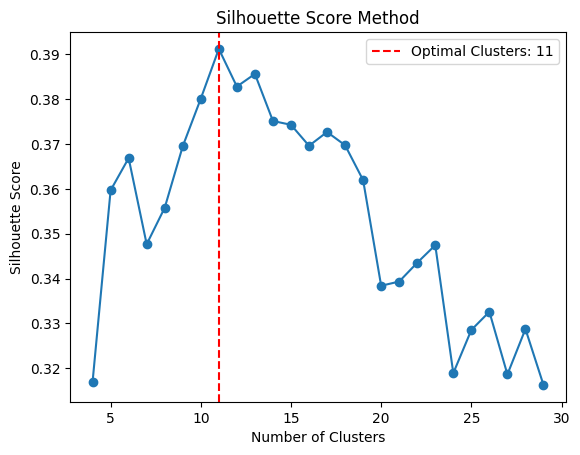

Optimal Number of Clusters: 11


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [182]:
#clustering the players into clusters
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

players = np.array(players)

silhouette_scores = []

k_range = range(4, 30)  

# Iterate through each number of clusters
for k in k_range:
    # Initialize and fit the k-means model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(players)
    
    # Predict cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(players, labels)
    silhouette_scores.append(silhouette_avg)

# Find the index of the maximum silhouette score
optimal_clusters_idx = np.argmax(silhouette_scores)
optimal_clusters = k_range[optimal_clusters_idx]

# Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal Clusters: {optimal_clusters}')
plt.legend()
plt.show()

print("Optimal Number of Clusters:", optimal_clusters)

# Initialize and fit the k-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(players)

# Predict cluster labels
labels = kmeans.labels_




In [168]:
from collections import defaultdict

# Group data points by their labels
clusters = defaultdict(list)
for i, label in enumerate(labels):
    clusters[label].append(i)

# Print each label and its data points
for label, data_points in clusters.items():
    print(f"Label: {label}")
    print(f"Data points: {data_points}")

Label: 6
Data points: [0, 6, 18, 38, 124, 142, 182]
Label: 1
Data points: [1, 29, 41, 66, 76, 78, 112, 137, 149, 158, 173, 178, 179]
Label: 10
Data points: [2, 19, 68, 85, 92, 99, 100, 102, 117, 125, 148, 153, 160, 170, 175, 189, 198]
Label: 2
Data points: [3, 13, 14, 21, 22, 24, 32, 37, 56, 63, 64, 83, 84, 95, 96, 104, 107, 109, 110, 114, 128, 135, 139, 140, 147, 154, 157, 166, 171, 188, 196, 199]
Label: 8
Data points: [4, 9, 10, 20, 26, 27, 28, 40, 43, 47, 48, 53, 58, 65, 74, 75, 89, 97, 105, 108, 111, 116, 122, 129, 131, 134, 150, 152, 161, 162, 163, 197]
Label: 9
Data points: [5, 7, 30, 33, 42, 57, 60, 88, 98, 126, 132, 138, 141, 143, 151, 185, 190, 195]
Label: 3
Data points: [8, 12, 59, 72, 94, 103, 120, 127, 136, 174, 177, 180, 191, 192, 193]
Label: 4
Data points: [11, 16, 34, 44, 45, 46, 51, 52, 55, 62, 69, 73, 79, 81, 106, 164, 168, 176, 181, 184, 187, 194, 200]
Label: 5
Data points: [15, 17, 71, 77, 80, 93, 115, 121, 144, 159, 165]
Label: 0
Data points: [23, 31, 49, 61, 67, 70

#### Solution to Problem Statement 1

The answer we got for first part is 11 different Stratergies are possible.

#### Solution to Problem Statement 2
The list of 11 sets of cluster are as follows:

In [ ]:
Label: 6
Data points: [0, 6, 18, 38, 124, 142, 182]
Label: 1
Data points: [1, 29, 41, 66, 76, 78, 112, 137, 149, 158, 173, 178, 179]
Label: 10
Data points: [2, 19, 68, 85, 92, 99, 100, 102, 117, 125, 148, 153, 160, 170, 175, 189, 198]
Label: 2
Data points: [3, 13, 14, 21, 22, 24, 32, 37, 56, 63, 64, 83, 84, 95, 96, 104, 107, 109, 110, 114, 128, 135, 139, 140, 147, 154, 157, 166, 171, 188, 196, 199]
Label: 8
Data points: [4, 9, 10, 20, 26, 27, 28, 40, 43, 47, 48, 53, 58, 65, 74, 75, 89, 97, 105, 108, 111, 116, 122, 129, 131, 134, 150, 152, 161, 162, 163, 197]
Label: 9
Data points: [5, 7, 30, 33, 42, 57, 60, 88, 98, 126, 132, 138, 141, 143, 151, 185, 190, 195]
Label: 3
Data points: [8, 12, 59, 72, 94, 103, 120, 127, 136, 174, 177, 180, 191, 192, 193]
Label: 4
Data points: [11, 16, 34, 44, 45, 46, 51, 52, 55, 62, 69, 73, 79, 81, 106, 164, 168, 176, 181, 184, 187, 194, 200]
Label: 5
Data points: [15, 17, 71, 77, 80, 93, 115, 121, 144, 159, 165]
Label: 0
Data points: [23, 31, 49, 61, 67, 70, 82, 90, 113, 118, 123, 155, 172, 186]
Label: 7
Data points: [25, 35, 36, 39, 50, 54, 86, 87, 91, 101, 119, 130, 133, 145, 146, 156, 167, 169, 183]

#### Solution to Problem Statement 4
A monte Carlo Simulation for the different Stratergies is as follows:

In [ ]:
import csv
import numpy as np
from sklearn.cluster import KMeans

# Read data from CSV
games = []

with open("input_game.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        games.append(row)

# Convert the list of games to a NumPy array
games_array = np.array(games)

# Extract player IDs and actions
player_ids = np.concatenate((games_array[:, 1].astype(int), games_array[:, 2].astype(int)))
player_actions = np.concatenate((games_array[:, 3], games_array[:, 4]))

# Encode player actions as numeric values
action_mapping = {'TRUST': 0, 'CHEAT': 1}
encoded_actions = np.array([action_mapping[action] for action in player_actions])

# Combine player IDs and encoded actions into feature matrix
feature_matrix = np.column_stack((player_ids, encoded_actions))

# Apply K-means clustering
num_clusters = 2  # Adjust this number as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(feature_matrix)
labels = kmeans.labels_

# Print cluster labels
print("Cluster labels for players:")
for player_id, label in zip(player_ids, labels):
    print(f"Player {player_id}: Cluster {label}")

### Additional IDEAS FOR PROBLEM STATEMENT

In [ ]:
#reading the data and defining the profit function
import csv
# Read data from CSV
games = []

with open("input_game.csv", 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        games.append(row)


# Define functions for calculating profits and comparing strategies
def calculate_profit(action1, action2):
    if action1 == 'TRUST' and action2 == 'TRUST':
        return 2, 2
    elif action1 == 'CHEAT' and action2 == 'CHEAT':
        return 1, 1
    elif action1 == 'TRUST' and action2 == 'CHEAT':
        return -1, 3
    elif action1 == 'CHEAT' and action2 == 'TRUST':
        return 3, -1

def compare_strategies(player_actions, other_player_actions, margin=0.1):
    total_comparisons = len(player_actions)
        
    if total_comparisons == 0:
        return 0.0  # If there are no comparisons to make, return 0 similarity
        
    similar_strategy_count = 0
        
    for i in range(total_comparisons):
        p1_profit, _ = calculate_profit(player_actions[i], player_actions[i])
        for other_actions in other_player_actions:
            other_profit, _ = calculate_profit(player_actions[i], other_actions[i])
            if abs(p1_profit - other_profit) <= margin:
                similar_strategy_count += 1
                break
    similarity_ratio = similar_strategy_count / total_comparisons
    return similarity_ratio


#### Additional Ideas No 1 for Problem Statement 
Our First Idea is as follows : we loop over all players $A_i$ and $A_j$ ; Now for any remaining player $A_k$.                                                                        We first form the (Total Profit After $N$ Rounds)/$N$ array for player $A_i$ vs $A_k$ and similarly for $A_j$ vs $A_k$ ,we then compare the difference in these graphs by a margin of $10%$ ,If over all possible $A_k$ these graphs are nearly similar we can say that $A_i$ and $A_j$ followed the same stratergy. 

This idea will work in $\mathcal{O}(n^3)$ as chosing an arbitary pair of $A_i$ and $A_j$ and then picking any other player will work in $\dfrac{n\cdot(n-1)\cdot (n-2)}{2} \approx \mathcal{O}(n^3)$.This can be optimized using DSU using path compression.An implementation is as follows.

In [ ]:
# Organize data
players = set()
rounds = []
profits = []

for game in games:
    _, p1_id, p2_id, p1_action, p2_action, _ = game
    players.add(p1_id)
    players.add(p2_id)
    rounds.append((p1_id, p2_id))
    profits.append((p1_action, p2_action))

players = sorted(list(players))
pairs = [(p1, p2) for p1 in players for p2 in players if p1 < p2]

# Now let's implement the clustering logic
# We will use Disjoint Set Union (DSU) data structure for clustering

class DSU:
    def _init_(self, n):
        self.parent = [i for i in range(n)]
        self.rank = [0] * n
    
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)
        
        if x_root == y_root:
            return
        
        if self.rank[x_root] < self.rank[y_root]:
            self.parent[x_root] = y_root
        elif self.rank[x_root] > self.rank[y_root]:
            self.parent[y_root] = x_root
        else:
            self.parent[y_root] = x_root
            self.rank[x_root] += 1

#Compare strategies and cluster players
margin = 0.1  # Margin for comparing strategies

dsu = DSU(len(players))

for p1, p2 in pairs:
    p1_actions = [profits[i][0] for i in range(len(rounds)) if rounds[i] == (p1, p2)]
    p2_actions = [profits[i][1] for i in range(len(rounds)) if rounds[i] == (p1, p2)]
    
    similarity_ratio = compare_strategies(p1_actions, p2_actions, margin)
    if similarity_ratio > 0.5:
        dsu.union(players.index(p1), players.index(p2))

# Count clusters
clusters = set()
for i in range(len(players)):
    clusters.add(dsu.find(i))

num_clusters = len(clusters)

print("Number of clusters formed by DSU:", num_clusters)

### Additional Idea No 2 for Problem Statement 
Using the similar idea as Idea No 1 here we use K-Means Algorithm instead of DSU for optimizing our code

In [ ]:
# Organize data
players = set()
rounds = []
profits = []

for game in games:
    _, p1_id, p2_id, p1_action, p2_action, _ = game
    players.add(p1_id)
    players.add(p2_id)
    rounds.append((p1_id, p2_id))
    profits.append((p1_action, p2_action))

players = sorted(list(players))

# Collect player actions for K-means clustering
player_actions = np.zeros((len(profits), 2))
for idx, (p1_action, p2_action) in enumerate(profits):
    if p1_action == 'TRUST':
        player_actions[idx][0] = 1
    if p2_action == 'TRUST':
        player_actions[idx][1] = 1

# Apply K-means clustering
num_clusters = 220  # Adjust this number as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(player_actions)
labels = kmeans.labels_

# Compare player strategies and cluster similar players
margin = 0.1  # Adjust this threshold as needed

similar_players = set()

for i in range(len(players)):
    for j in range(i + 1, len(players)):
        p1_actions = [action1 for action1, _ in profits if action1 == players[i]]
        p2_actions = [action2 for _, action2 in profits if action2 == players[j]]
        other_players_actions = [[action2 for action1, action2 in profits if action1 == other_player] for other_player in players if other_player != players[i] and other_player != players[j]]
        similarity_ratio1 = compare_strategies(p1_actions, other_players_actions, margin)
        similarity_ratio2 = compare_strategies(p2_actions, other_players_actions, margin)
        if similarity_ratio1 >= 1.0 and similarity_ratio2 >= 1.0:  # If both players have similar strategies
            similar_players.add(players[i])
            similar_players.add(players[j])

# Count clusters
num_clusters = len(similar_players)

print("Number of clusters formed by similar strategies:", num_clusters)